![Alt text: Slogan da Meteora.](https://i.imgur.com/VDYh2G1.png)

# 1. Estruturando a tabela

**Meteora** é uma loja que vende roupas e acessórios de diversas marcas por todos os estados do Brasil, para entender suas bases de dados e exibir informações relevantes com o objetivo de auxiliar suas tomadas de decisão.

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine, inspect, text

In [13]:
plt.rc('figure', figsize=(16, 6))

**Sobre as tabelas**

* itens_pedidos: tabela que informa sobre o que foi vendido, vai ter informação o preço, quantidade, para onde vai ser enviado e o frete do pedido
* pedidos: vai falar sobre a venda feita, tendo informação sobre os vendedores, preço do pedido e a data da venda
* produtos: informa características dos produtos que são comercializados na loja
* vendedores: informa o nome dos vendedores.

In [14]:
url_itens_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/itens_pedidos.csv'
url_pedidos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/pedidos.csv'
url_produtos = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/produtos.csv'
url_vendedores = 'https://github.com/alura-cursos/SQL-python-integracao/raw/main/TABELAS/vendedores.csv'

In [15]:
itens_pedidos = pd.read_csv(url_itens_pedidos)
pedidos = pd.read_csv(url_pedidos)
produtos = pd.read_csv(url_produtos)
vendedores = pd.read_csv(url_vendedores)

In [16]:
itens_pedidos.head()

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0
3,4,3820,1652,6,139,834,BR-DF,166.8
4,5,29012,2470,3,525,1575,BR-BA,315.0


In [17]:
pedidos.head()

,pedido_id,produto_id,vendedor_id,data_compra,total
0,341,41518,5,2019-01-05,780
1,1174,4307,3,2019-01-05,30875
2,1399,22407,1,2019-01-05,600
3,1652,3820,4,2019-01-05,834
4,2470,29012,2,2019-01-05,1575


In [18]:
produtos.head()

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado
3,47475,Calca Alfaiataria Preta,490,Mixed,263658,Usado
4,74864,Vestido Jeans Babados,130,Zara,219248,Usado


In [19]:
vendedores.head()

,vendedor_id,nome_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [20]:
engine = create_engine('sqlite:///:memory:')

In [21]:
produtos.to_sql('produtos', engine, index=False)

205

In [22]:
itens_pedidos.to_sql('itens_pedidos', engine, index=False)
pedidos.to_sql('pedidos', engine, index=False)
vendedores.to_sql('vendedores', engine, index=False)

5

In [23]:
inspector = inspect(engine)
inspector.get_table_names()

['itens_pedidos', 'pedidos', 'produtos', 'vendedores']

# 2. Primeiras consultas

Vamos entender a característica do produto que é comercializadora na Meteora, analisando a **condição** dos produtos vendidos.

In [24]:
with engine.connect() as conn:
    query = conn.execute(text('SELECT condicao FROM produtos'))
    result = query.fetchall()

pd.DataFrame(result, columns=query.keys())

,Condicao
0,Usado
1,Usado
2,Usado
3,Usado
4,Usado
...,...
200,Usado
201,Usado
202,Usado
203,Usado


In [25]:
def sql_df(select_command: str):
    with engine.connect() as conn:
        query = conn.execute(text(select_command))
        result = query.fetchall()

    return pd.DataFrame(result, columns=query.keys())

In [26]:
df_condicao_produtos = sql_df("""
    SELECT condicao, COUNT(*) \"Quantidade de produtos\"
        FROM produtos
            GROUP BY condicao
            ORDER BY \"Quantidade de produtos\" DESC
""")

df_condicao_produtos

,Condicao,Quantidade de produtos
0,Usado,176
1,Novo com etiqueta,22
2,Novo sem etiqueta,7


Text(0, 0.5, 'Quantidade produtos')

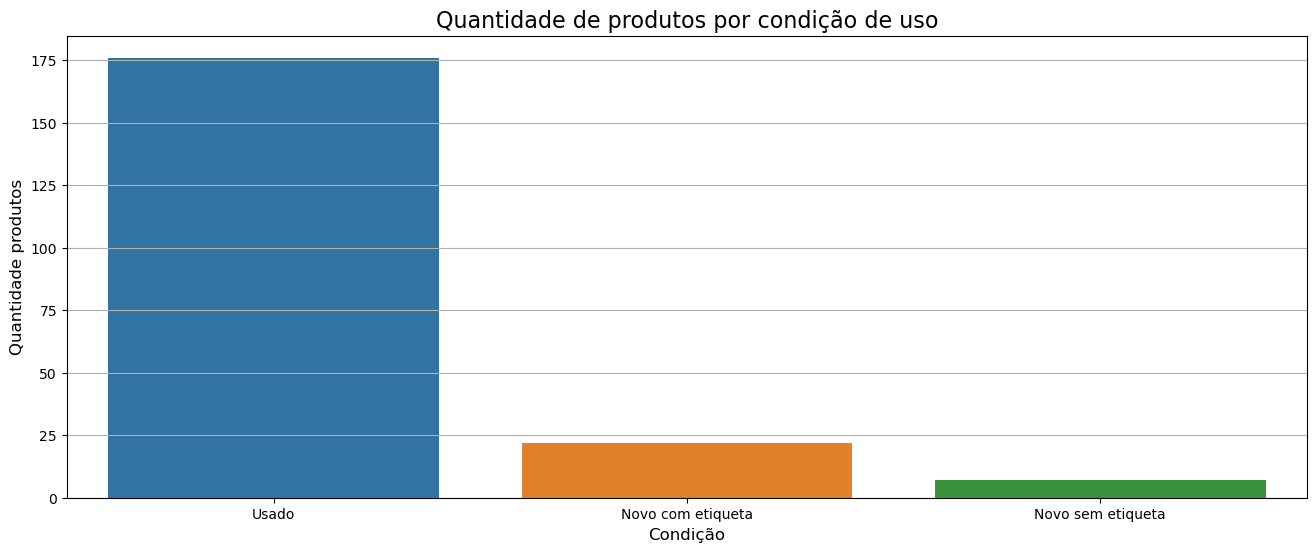

In [27]:
ax = sns.barplot(df_condicao_produtos, x='Condicao', y='Quantidade de produtos')

ax.grid(axis='y')
ax.set_title('Quantidade de produtos por condição de uso', fontsize=16)
ax.set_xlabel('Condição', fontsize=12)
ax.set_ylabel('Quantidade produtos', fontsize=12)

Agora precisamos ranquear os produtos que mais foram pedidos por **quantidade** para entender a necessidade de um estoque de produtos na loja.

In [28]:
sql_df('SELECT * FROM produtos').head(3)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado
1,9981,Bolsa Coral Saco,4000,Givenchy,278612,Usado
2,84176,Camisa Xadrez Verde,310,Joe Fresh,322482,Usado


In [29]:
sql_df('SELECT * FROM itens_pedidos').head(3)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0
1,2,4307,1174,5,6175,30875,BR-RJ,6175.0
2,3,22407,1399,3,200,600,BR-PB,120.0


In [30]:
qtd_produtos_vendidos = sql_df('''
    SELECT P.produto "Produto", SUM(I.quantidade) "Quantidade vendida"
        FROM produtos P, itens_pedidos I
            WHERE P.produto_id = I.produto_id
            GROUP BY "Produto"
            ORDER BY "Quantidade vendida" DESC
            LIMIT 20
''')

qtd_produtos_vendidos

,Produto,Quantidade vendida
0,Vestido Recortes Cores,795
1,Calca Jeans Costuras,755
2,Saia Pregas Preta,751
3,Calca Alfaiataria Preta,750
4,Saia Midi Cinto,549
5,Vestido Nude Reta,547
6,Blusa Manga Estampa,536
7,Camisa Xadrez Azul,511
8,Cropped Escritas Pb,508
9,Bomber Tricot Off,507


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Vestido Recortes Cores'),
  Text(1, 0, 'Calca Jeans Costuras'),
  Text(2, 0, 'Saia Pregas Preta'),
  Text(3, 0, 'Calca Alfaiataria Preta'),
  Text(4, 0, 'Saia Midi Cinto'),
  Text(5, 0, 'Vestido Nude Reta'),
  Text(6, 0, 'Blusa Manga Estampa'),
  Text(7, 0, 'Camisa Xadrez Azul'),
  Text(8, 0, 'Cropped Escritas Pb'),
  Text(9, 0, 'Bomber Tricot Off'),
  Text(10, 0, 'Saia Transparente Cover'),
  Text(11, 0, 'Cropped Listras Florzinhas'),
  Text(12, 0, 'Blusa Veludo Flores'),
  Text(13, 0, 'Camisa Fio Animalprint'),
  Text(14, 0, 'Blusinha Mandala Tela'),
  Text(15, 0, 'Blusinha Basica Mescla'),
  Text(16, 0, 'Shorts Neoprene Pb'),
  Text(17, 0, 'Vestido Longo Estampa'),
  Text(18, 0, 'Macacao Malha Preto'),
  Text(19, 0, 'Regata Nadador Lilas')])

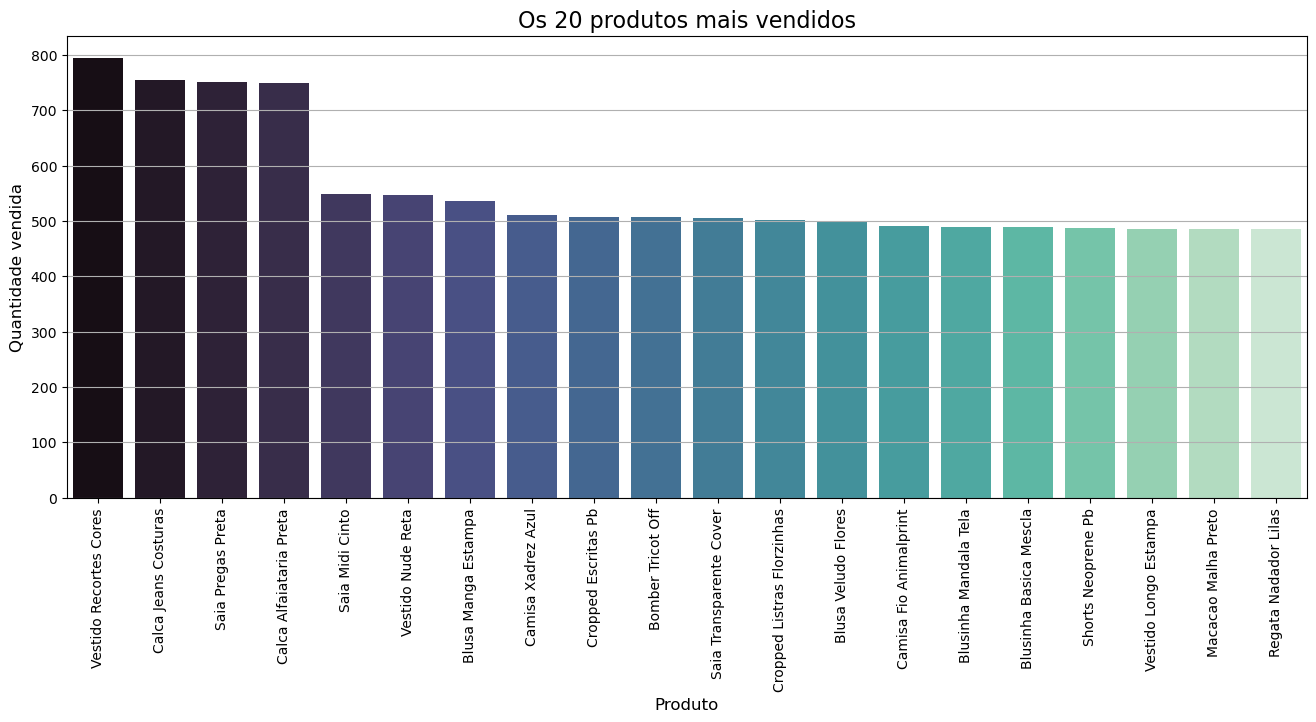

In [31]:
ax = sns.barplot(
    qtd_produtos_vendidos,
    x='Produto',
    y='Quantidade vendida',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('Os 20 produtos mais vendidos', fontsize=16)
ax.set_xlabel('Produto', fontsize=12)
ax.set_ylabel('Quantidade vendida', fontsize=12)
plt.xticks(rotation=90)

## 2.1 Produtos mais rentáveis

In [32]:
produtos_mais_rentaveis = sql_df('''
    SELECT P.produto "Produto", I.quantidade * I.valor_unitario "Total arrecadado"
        FROM itens_pedidos I, produtos P
            WHERE P.produto_id = I.produto_id
            GROUP BY "Produto"
            ORDER BY "Total arrecadado" DESC
            LIMIT 20
''')
produtos_mais_rentaveis

,Produto,Total arrecadado
0,Bolsa Classica Roxa,32500
1,Bolsa Intrecciato Caramelo,30875
2,Vestido Longo Preto,25200
3,Saia Couro Tijolo,22800
4,Bolsa Coral Saco,20000
5,Sapato Cetim Pink,19500
6,Oculos Redondo Purple,15600
7,Clutch Preta Pregas,8000
8,Saia Roxa Estampada,6000
9,Vestido Azul Franzido,5340


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Bolsa Classica Roxa'),
  Text(1, 0, 'Bolsa Intrecciato Caramelo'),
  Text(2, 0, 'Vestido Longo Preto'),
  Text(3, 0, 'Saia Couro Tijolo'),
  Text(4, 0, 'Bolsa Coral Saco'),
  Text(5, 0, 'Sapato Cetim Pink'),
  Text(6, 0, 'Oculos Redondo Purple'),
  Text(7, 0, 'Clutch Preta Pregas'),
  Text(8, 0, 'Saia Roxa Estampada'),
  Text(9, 0, 'Vestido Azul Franzido'),
  Text(10, 0, 'Scarpin Bege Textura'),
  Text(11, 0, 'Oculos Lente Azulada'),
  Text(12, 0, 'Saia Guipir Nude'),
  Text(13, 0, 'Calca Jeans Trancada'),
  Text(14, 0, 'Sapatilha Python Bege'),
  Text(15, 0, 'Bolsa Azul Candy'),
  Text(16, 0, 'Casaqueto Fio Mescla'),
  Text(17, 0, 'Bota Veludo Azul'),
  Text(18, 0, 'Oculos Metal'),
  Text(19, 0, 'Blusa Renda Pb')])

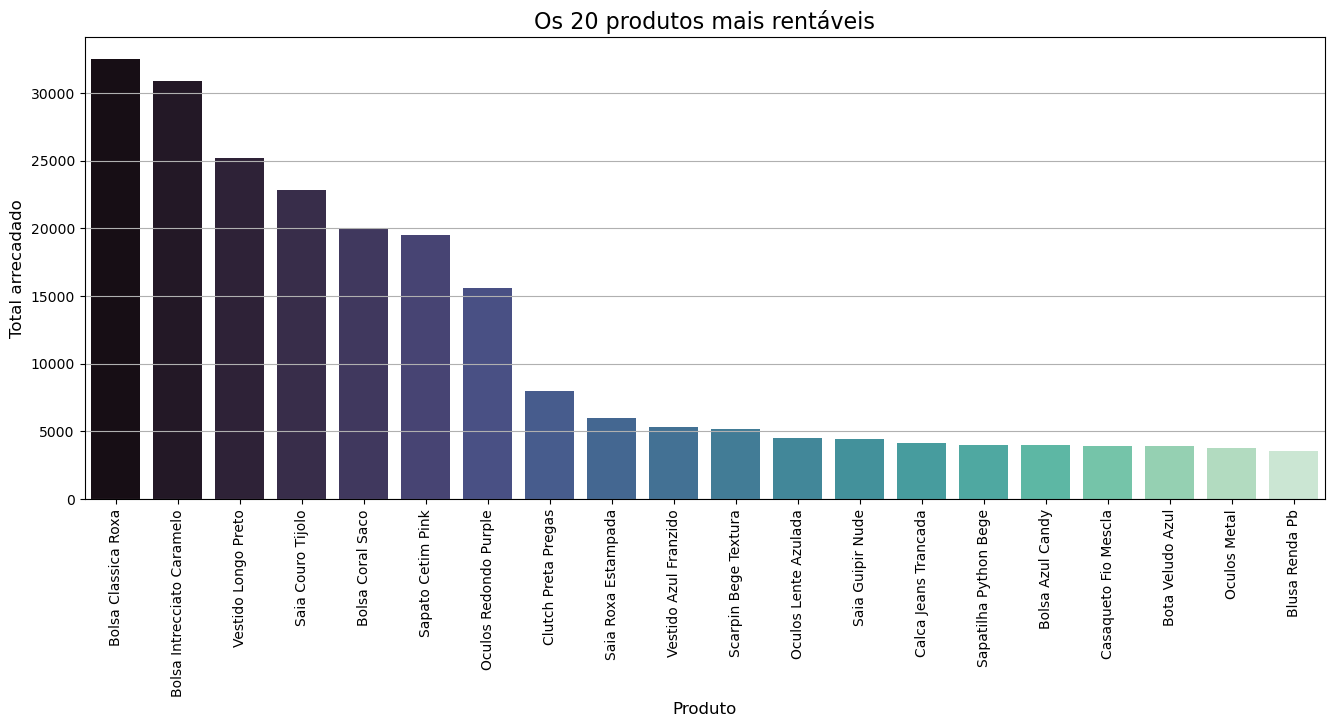

In [33]:
ax = sns.barplot(
    produtos_mais_rentaveis,
    x='Produto',
    y='Total arrecadado',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('Os 20 produtos mais rentáveis', fontsize=16)
ax.set_xlabel('Produto', fontsize=12)
ax.set_ylabel('Total arrecadado', fontsize=12)
plt.xticks(rotation=90)

## 2.2 As 15 marcas mais pedidas por quantidade de venda

In [34]:
itens_pedidos.head(1)

,id_nf,produto_id,pedido_id,quantidade,valor_unitario,valor_total,Estado,frete
0,1,41518,341,3,260,780,BR-BA,156.0


In [35]:
produtos.head(1)

,produto_id,produto,preco,marca,sku,Condicao
0,21244,Oculos Lente Azulada,1120,D&g Dolce & Gabbana,209297,Usado


In [36]:
marcas_mais_vendidas = sql_df('''
    SELECT P.marca "Marca", SUM(I.quantidade) "Quantidade vendida"
        FROM itens_pedidos I, produtos P
            WHERE I.produto_id = P.produto_id
            GROUP BY "Marca"
            ORDER BY "Quantidade vendida" DESC
            LIMIT 15
''')

marcas_mais_vendidas

,Marca,Quantidade vendida
0,Zara,9545
1,Mixed,5748
2,Animale,4013
3,Le Lis Blanc,2479
4,Banana Republic,2045
5,Farm,1779
6,H&m,1576
7,Shoulder,1317
8,Sacada,1285
9,Dress&co,1262


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Zara'),
  Text(1, 0, 'Mixed'),
  Text(2, 0, 'Animale'),
  Text(3, 0, 'Le Lis Blanc'),
  Text(4, 0, 'Banana Republic'),
  Text(5, 0, 'Farm'),
  Text(6, 0, 'H&m'),
  Text(7, 0, 'Shoulder'),
  Text(8, 0, 'Sacada'),
  Text(9, 0, 'Dress&co'),
  Text(10, 0, 'Tigresse'),
  Text(11, 0, 'Forever 21'),
  Text(12, 0, 'Forum'),
  Text(13, 0, 'Hollister'),
  Text(14, 0, 'Ellus')])

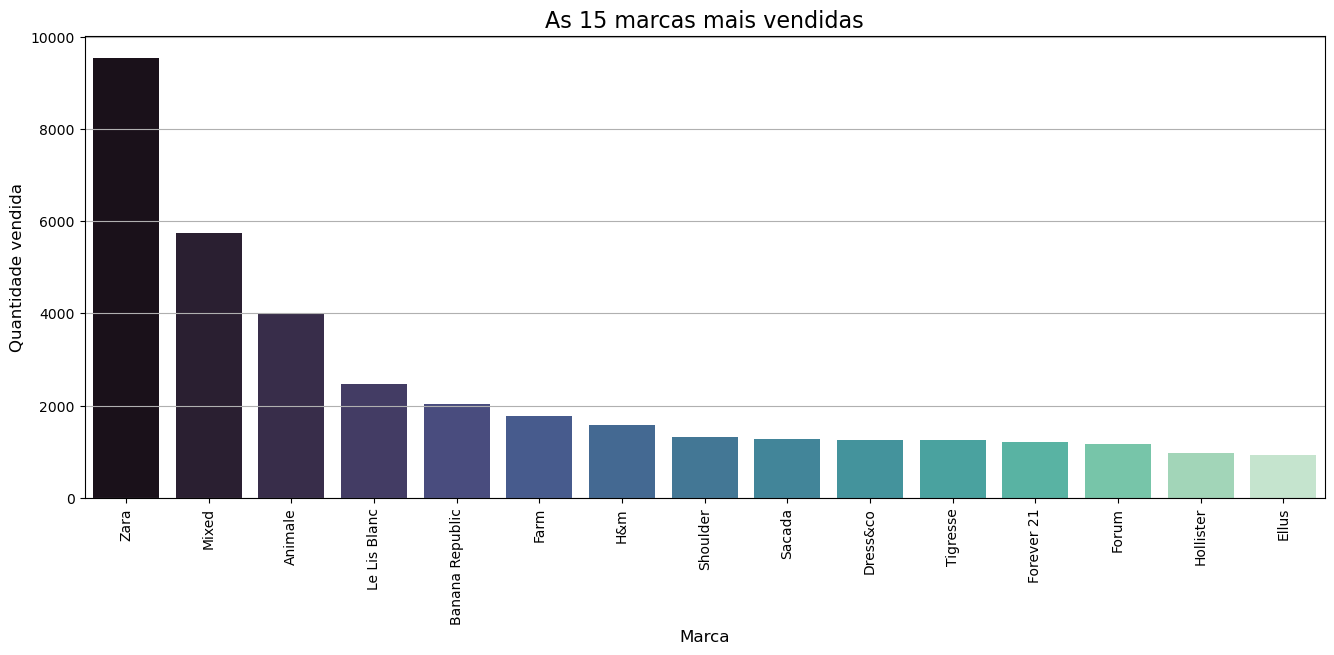

In [37]:
ax = sns.barplot(
    marcas_mais_vendidas,
    x='Marca',
    y='Quantidade vendida',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('As 15 marcas mais vendidas', fontsize=16)
ax.set_xlabel('Marca', fontsize=12)
ax.set_ylabel('Quantidade vendida', fontsize=12)
plt.xticks(rotation=90)

# 3. Lidando com filtro

Vamos iniciar uma análise de desempenho do **time de vendedores** da Meteora. A intenção aqui é entender como se deram as vendas dos vendedores no **ano anterior** para que possam ser aplicadas promoções e bônus salarial para a equipe no ano atual da tabela que é 2021

In [38]:
vendedores

,vendedor_id,nome_vendedor
0,1,Ana Duarte
1,2,Daniel Siqueira
2,3,Nadia Oliveira
3,4,Millena Pereira
4,5,Paulo Calanca


In [39]:
quantidade_vendas_vendedores = sql_df('''
    SELECT V.nome_vendedor "Vendedor", COUNT(*) "Quantidade de vendas"
        FROM pedidos P, vendedores V
            WHERE P.vendedor_id = V.vendedor_id AND
                  STRFTIME('%Y', P.data_compra) = '2020'
            GROUP BY "Vendedor"
            ORDER BY "Quantidade de vendas" DESC
''')

quantidade_vendas_vendedores

,Vendedor,Quantidade de vendas
0,Ana Duarte,3427
1,Daniel Siqueira,3338
2,Nadia Oliveira,2782
3,Millena Pereira,2510
4,Paulo Calanca,2488


Para entender o desempenho de vendas dos vendedores no ano de 2020, é preciso trabalhar com os dados que estão presentes apenas no ano de 2020.

Text(0, 0.5, 'Quantidade de vendas')

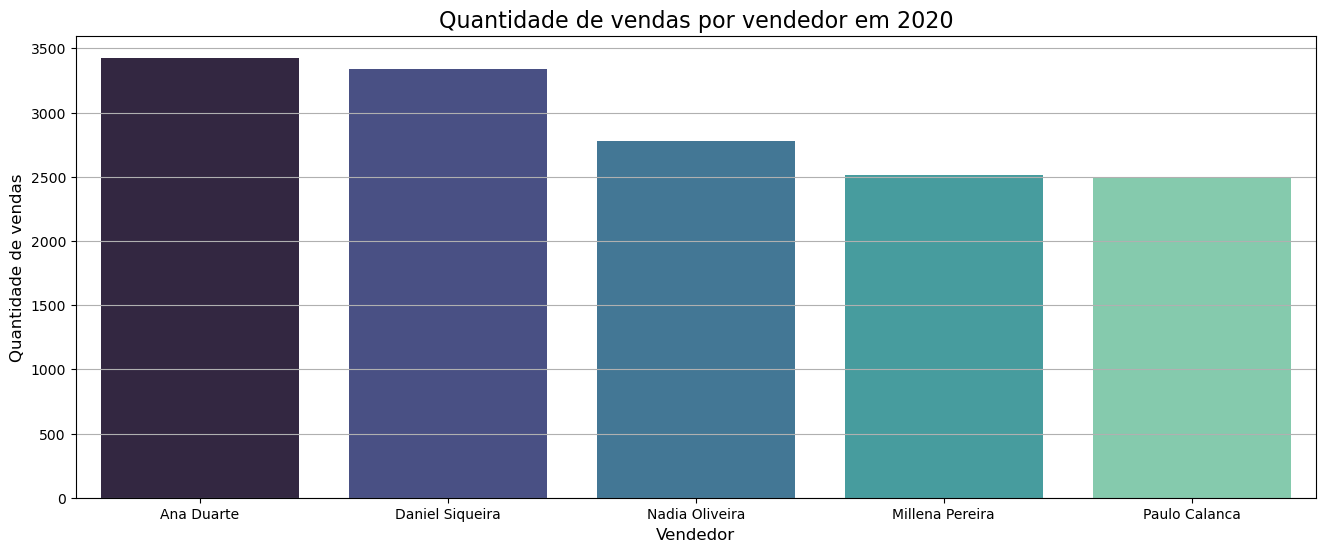

In [40]:
ax = sns.barplot(
    quantidade_vendas_vendedores,
    x='Vendedor',
    y='Quantidade de vendas',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('Quantidade de vendas por vendedor em 2020', fontsize=16)
ax.set_xlabel('Vendedor', fontsize=12)
ax.set_ylabel('Quantidade de vendas', fontsize=12)

In [41]:
valor_medio_vendas_vendedores = sql_df('''
    SELECT V.nome_vendedor "Vendedor", AVG(P.total) "Valor médio de vendas"
        FROM pedidos P, vendedores V
            WHERE P.vendedor_id = V.vendedor_id AND
                  STRFTIME('%Y', P.data_compra) = '2020'
            GROUP BY "Vendedor"
            ORDER BY "Valor médio de vendas" DESC
''')

valor_medio_vendas_vendedores

,Vendedor,Valor médio de vendas
0,Daniel Siqueira,1972.338526
1,Millena Pereira,1894.614343
2,Ana Duarte,1843.452582
3,Nadia Oliveira,1818.342200
4,Paulo Calanca,1813.469855


Text(0, 0.5, 'Valor médio de vendas')

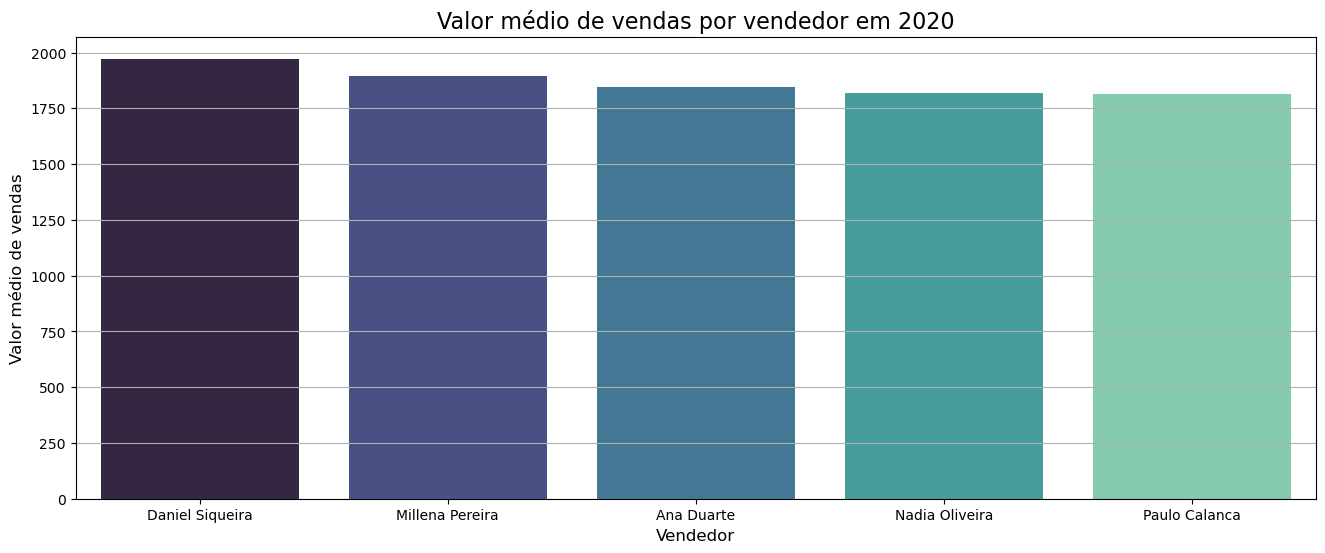

In [42]:
ax = sns.barplot(
    valor_medio_vendas_vendedores,
    x='Vendedor',
    y='Valor médio de vendas',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('Valor médio de vendas por vendedor em 2020', fontsize=16)
ax.set_xlabel('Vendedor', fontsize=12)
ax.set_ylabel('Valor médio de vendas', fontsize=12)

## 3.1 Faturamento ao longo dos meses de 2020

In [43]:
faturamento_por_mes_2020 = sql_df('''
    SELECT STRFTIME('%m', data_compra) "Mês", SUM(total) "Faturamento"
        FROM pedidos
            WHERE STRFTIME('%Y', data_compra) = '2020'
            GROUP BY "Mês"
''')

faturamento_por_mes_2020

,Mês,Faturamento
0,01,2458252
1,02,2168386
2,03,2472297
3,04,2189559
4,05,2168099
5,06,1577791
6,07,1881010
7,08,2268550
8,09,2428227
9,10,2079915


Text(0, 0.5, 'Faturamento')

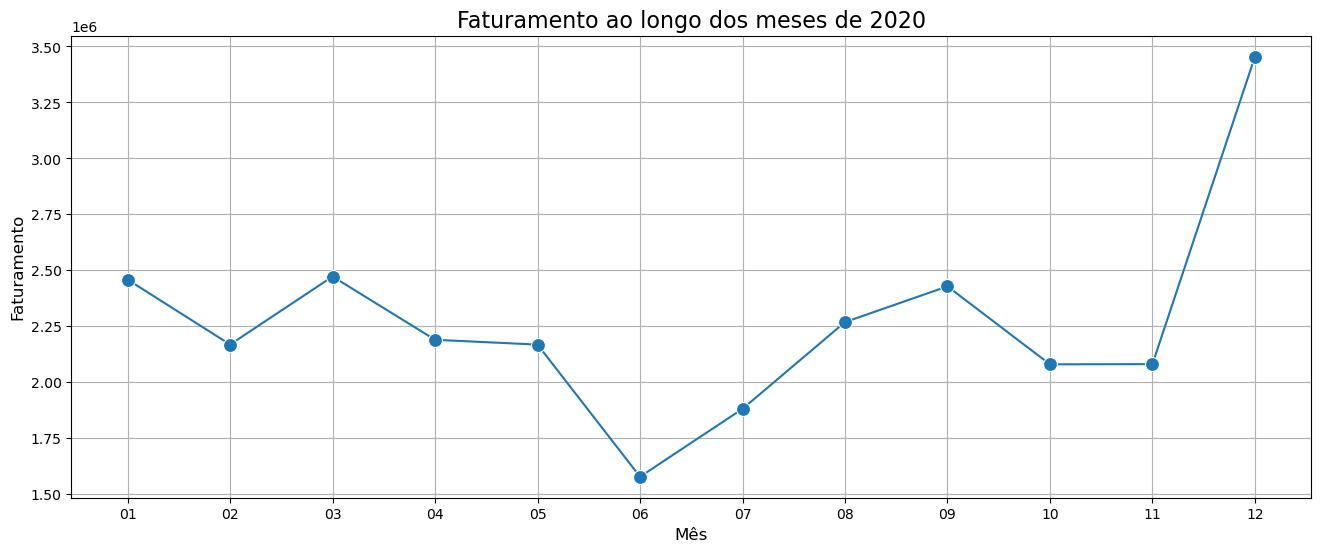

In [44]:
ax = sns.lineplot(
    faturamento_por_mes_2020,
    x='Mês',
    y='Faturamento',
    marker='o',
    markersize=10
)

ax.grid()
ax.set_title('Faturamento ao longo dos meses de 2020', fontsize=16)
ax.set_xlabel('Mês', fontsize=12)
ax.set_ylabel('Faturamento', fontsize=12)

# 4. Avançando nas relações

A Meteora agora deseja incrementar as suas vendas no **estado de São Paulo (SP)**, por acreditar ser uma região mais propícia às vendas já que tem uma boa concentração de pessoas e mercado também.

Mas será que São Paulo já não rende muitas vendas em relação a outros estados?

In [54]:
sql_df('''
    SELECT estado, COUNT(*) "Quantidade de vendas"
        FROM itens_pedidos
            GROUP BY estado
            ORDER BY "Quantidade de vendas" DESC
''')

,Estado,Quantidade de vendas
0,BR-MA,974
1,BR-DF,953
2,BR-MT,937
3,BR-GO,933
4,BR-PA,932
5,BR-AL,928
6,BR-PE,927
7,BR-RR,925
8,BR-RO,925
9,BR-RN,921


Uma das ações que a Meteora pretende seguir para as vendas em SP é escolher dois de seus vendedores para que eles **foquem suas vendas** lá. Para essa escolha é interessante ter os profissionais que **mais tenham vendido** para as pessoas da região.

In [52]:
vendedores_com_mais_vendas_sp = sql_df('''
    SELECT V.nome_vendedor "Vendedor", COUNT(*) "Quantidade de vendas"
        FROM pedidos P, vendedores V, itens_pedidos I
            WHERE P.vendedor_id = V.vendedor_id AND
                  P.pedido_id = I.pedido_id AND
                  I.estado = 'BR-SP'
            GROUP BY "Vendedor"
            ORDER BY "Quantidade de vendas" DESC
''')

vendedores_com_mais_vendas_sp

,Vendedor,Quantidade de vendas
0,Daniel Siqueira,190
1,Paulo Calanca,182
2,Nadia Oliveira,181
3,Ana Duarte,180
4,Millena Pereira,157


Text(0, 0.5, '\tQuantidade de vendas')

c:\Users\alber\anaconda3\envs\stats\lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\alber\anaconda3\envs\stats\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


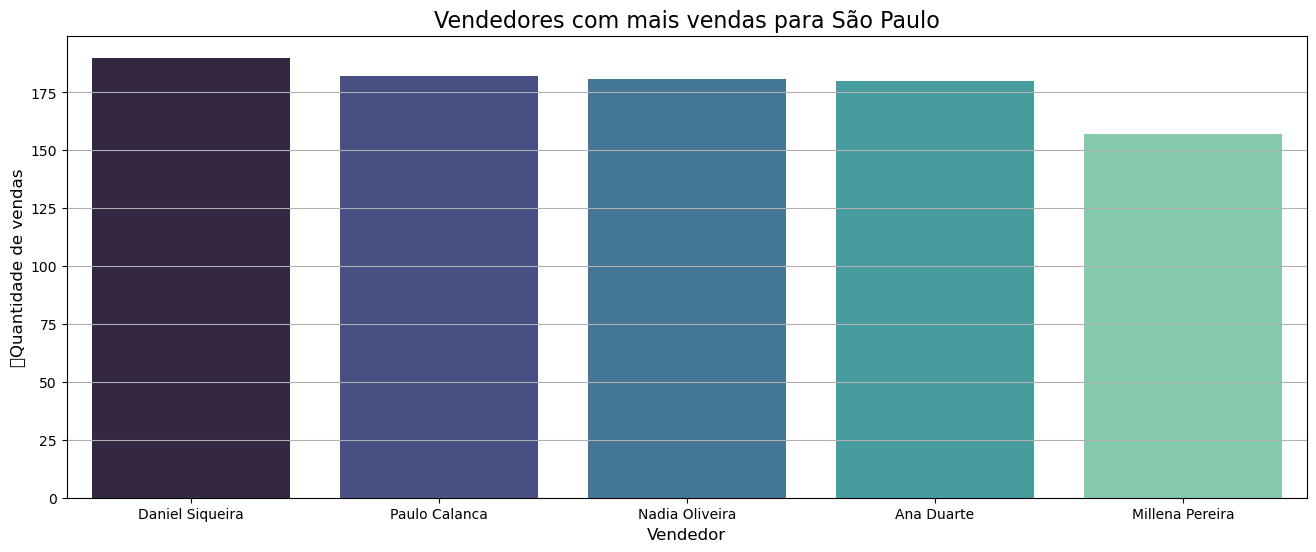

In [56]:
ax = sns.barplot(
    vendedores_com_mais_vendas_sp,
    x='Vendedor',
    y='Quantidade de vendas',
    palette='mako'
)

ax.grid(axis='y')
ax.set_title('Vendedores com mais vendas para São Paulo', fontsize=16)
ax.set_xlabel('Vendedor', fontsize=12)
ax.set_ylabel('	Quantidade de vendas', fontsize=12)